# OpenAI Gym Example

## CartPole-v0

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. 

The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

In [6]:
%matplotlib inline

import gym
import matplotlib

from algorithms.q_learning import QLearning
from utils.plotting import plot_episode_stats
from algorithms.discretization_functions import discretize_cartpole_v0

matplotlib.style.use('ggplot')

#### Init the env

In [7]:
env = gym.make("CartPole-v0")

#### Init the Q-learning agent

In [8]:
buckets = (1, 1, 6, 12,)

agent = QLearning(env, buckets=buckets, discretize_fn=discretize_cartpole_v0)

#### Make the agent learn

In [11]:
n_episodes = 10000

Q, stats = agent.learn(n_episodes)

env.close()

Episode 10000/10000.

#### Render the results

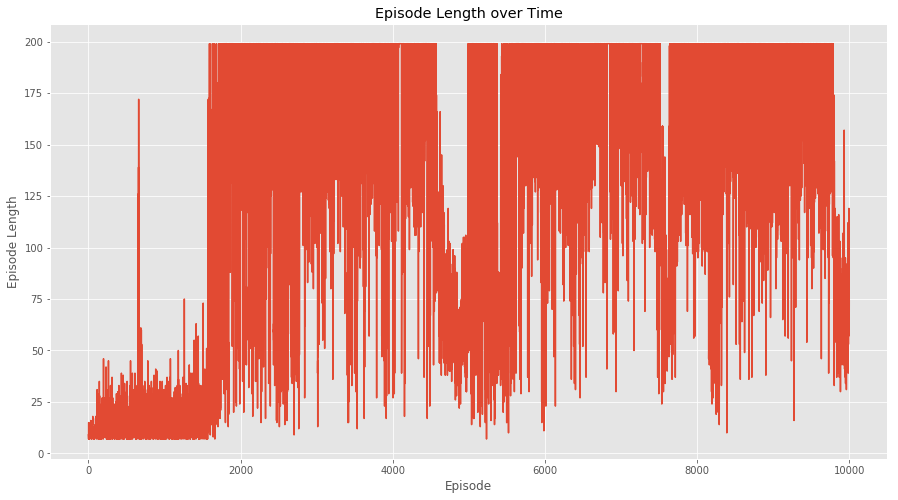

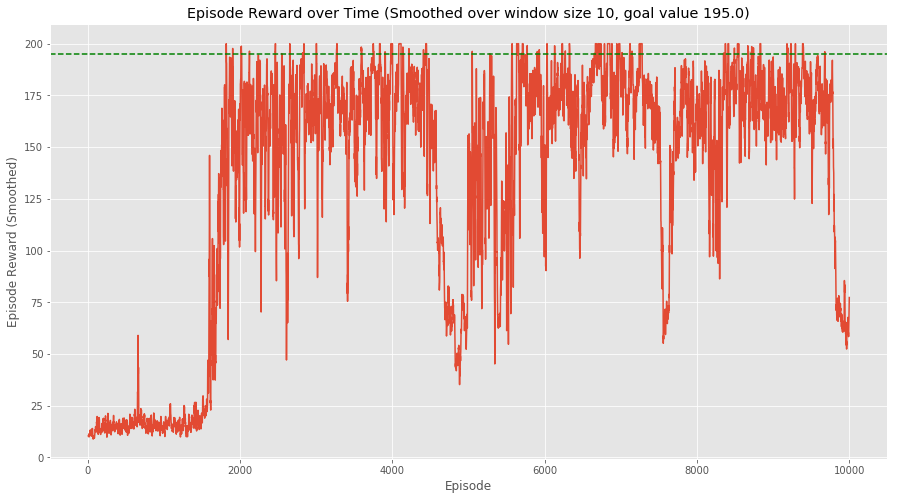

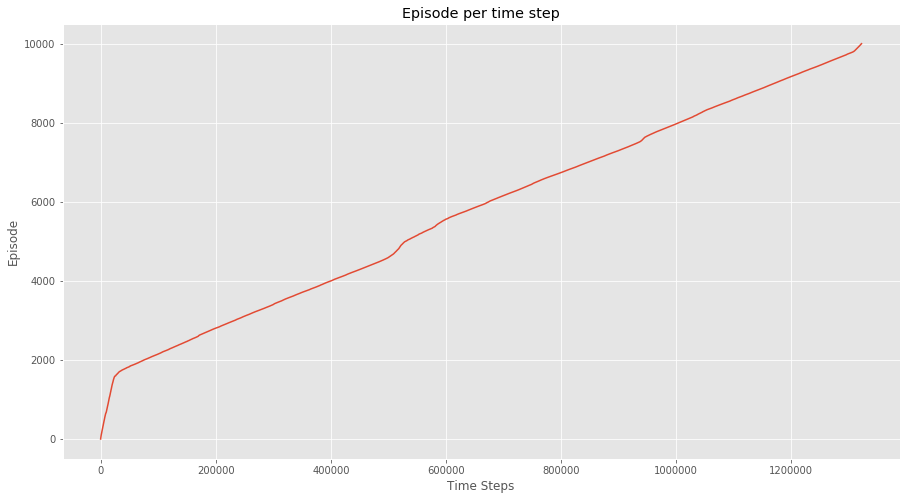

(<Figure size 1080x576 with 1 Axes>,
 <Figure size 1080x576 with 1 Axes>,
 <Figure size 1080x576 with 1 Axes>)

In [12]:
plot_episode_stats(stats, goal_value=195.0, fig_size=(15, 8))